---
# Random Forest
---


### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier


### Read data file

In [2]:
churn_df = pd.read_excel('../data/churn_cleaned_featEng.xlsx')
churn_df

,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,Internet Service_Fiber optic,Internet Service_No,...,Payment Method_Electronic check,Payment Method_Mailed check,Gender_Male,Phone Service_Yes,Multiple Lines_No phone service,Multiple Lines_Yes,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes
0,33.964131,118.272783,2,53.85,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
1,34.059281,118.307420,2,70.70,1,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
2,34.048013,118.293953,8,99.65,1,0,0,1,1,0,...,1,0,0,1,0,1,0,1,0,1
3,34.062125,118.315709,28,104.80,1,0,1,1,1,0,...,1,0,0,1,0,1,0,1,0,1
4,34.039224,118.266293,49,103.70,1,0,0,1,1,0,...,0,0,1,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,34.341737,116.539416,72,21.15,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,0
7039,34.667815,117.536183,24,84.80,0,0,1,1,0,0,...,0,1,1,1,0,1,0,1,0,1
7040,34.559882,115.637164,72,103.20,0,0,1,1,1,0,...,0,0,0,1,0,1,0,1,0,1
7041,34.167800,116.864330,11,29.60,0,0,1,1,0,0,...,1,0,0,0,1,0,0,0,0,0


---

<center>
    
## Preparing data

</center>

---

### Separate X and y features

In [3]:
# Seperate X and y features
X = churn_df.drop(columns=['Churn Value'])
y = churn_df['Churn Value']

### Split dataset (training/testing)

In [4]:
# Separating the dataset into a training dataset (70%) and testing+validation (30%) dataset
X_train, X_test_validation, y_train, y_test_validation = train_test_split(X, y, train_size=0.7, random_state=5)

# Separating the testing+valisation dataset into a testing dataset (15%) and a validation dataset (15%) 
X_val, X_test, y_val, y_test = train_test_split(X_test_validation, y_test_validation, test_size=0.5, random_state=5)

### Converting data subset to dataframe 

In [5]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

### Scale X features

In [6]:
# Create instance of scaler
scaler = StandardScaler()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

<center>
    
## Random Forest Model

</center>

---

### Run model on training dataset

In [7]:
# Create instance of model with default values
rfc = RandomForestClassifier(random_state=0)

# Fit  model
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=0)

### Run model on testing dataset

In [8]:
y_pred = rfc.predict(X_test_scaled)

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 100 decision-trees : 0.8089


In [9]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       783
           1       0.65      0.56      0.60       274

    accuracy                           0.81      1057
   macro avg       0.75      0.73      0.74      1057
weighted avg       0.80      0.81      0.80      1057



In [10]:
# Create instance of model with n_estimators=200
rfc_200 = RandomForestClassifier(n_estimators=200, random_state=0)

# Fit model
rfc_200.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

---

<center>
    
## Validation

</center>

---

In [11]:
y_pred_200 = rfc_200.predict(X_test_scaled)

print('Model accuracy score with 200 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_200)))

Model accuracy score with 200 decision-trees : 0.8117


## Selecting Important Features


In [12]:
# View feature scores

feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

Tenure Months                             0.173259
Monthly Charges                           0.138571
Latitude                                  0.121355
Longitude                                 0.119505
Internet Service_Fiber optic              0.045527
Payment Method_Electronic check           0.038983
Dependents_Yes                            0.035907
Contract_Two year                         0.034389
Contract_One year                         0.026466
Online Security_Yes                       0.023113
Gender_Male                               0.022691
Partner_Yes                               0.022000
Paperless Billing_Yes                     0.020619
Tech Support_Yes                          0.020408
Senior Citizen_Yes                        0.018516
Online Backup_Yes                         0.017909
Multiple Lines_Yes                        0.017634
Device Protection_Yes                     0.015504
Streaming Movies_Yes                      0.015199
Streaming TV_Yes               

In [13]:
# Separate X and y features
# Drop 'Phone Service_Yes','Multiple Lines_No phone service','Streaming TV_No internet service' as it's not important
churn_df = churn_df.drop(['Phone Service_Yes','Multiple Lines_No phone service','Streaming TV_No internet service'], axis=1)
X = churn_df.drop(columns=['Churn Value'])
y = churn_df['Churn Value']
# Separating the dataset into a training dataset (70%) and testing+validation (30%) dataset
X_train, X_test_validation, y_train, y_test_validation = train_test_split(X, y, train_size=0.7, random_state=5)

# Separating the testing+valisation dataset into a testing dataset (15%) and a validation dataset (15%) 
X_val, X_test, y_val, y_test = train_test_split(X_test_validation, y_test_validation, test_size=0.5, random_state=5)

X_train_scaled2 = scaler.fit_transform(X_train)
X_test_scaled2 = scaler.transform(X_test)

# Create instance of model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train_scaled2, y_train)

RandomForestClassifier()

In [14]:
y_pred_clf = clf.predict(X_test_scaled2)
print('Model accuracy score with three less features : {0:0.4f}'. format(accuracy_score(y_test, y_pred_clf))) 

Model accuracy score with three less features : 0.8098


In [15]:
cm = confusion_matrix(y_test, y_pred_clf)

print(cm)

[[706  77]
 [124 150]]


In [16]:
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       783
           1       0.66      0.55      0.60       274

    accuracy                           0.81      1057
   macro avg       0.76      0.72      0.74      1057
weighted avg       0.80      0.81      0.80      1057



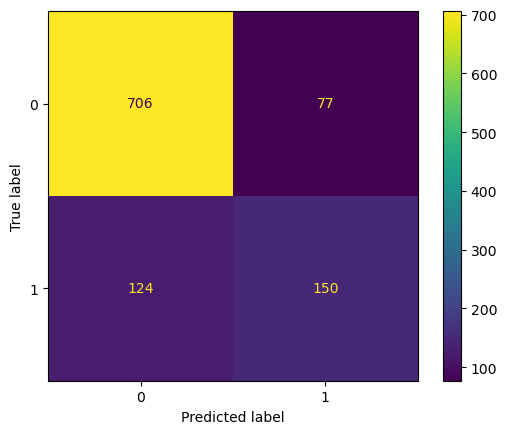

In [17]:
# Display the confusion matrix using ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

### To have the optimized parameters and compare different values we applied GridSearchCV on RandomForest model.

In [18]:

# Create a pipeline with a scaler and Random Forest classifier
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  
    ('classifier', RandomForestClassifier(random_state=42))  
])

#parameter grid for Random Forest
param_grid_rf = {
     # Number of trees in the forest
    'classifier__n_estimators': [100, 200, 300], 
     # Number of features to consider at each split
    'classifier__max_features': [None, 'sqrt','log2'], 
     # Maximum depth of the trees
    'classifier__max_depth': [None, 10, 20],  
    # Minimum samples required to split an internal node
    'classifier__min_samples_split': [2, 5, 10], 
    # Handling class imbalance
    'classifier__class_weight': ['balanced', {0: 1, 1: 1}, {0: 0.7, 1: 1.3}, {0: 0.5, 1: 1.5}, {0: 0.3, 1: 1.7}, {0: 0.1, 1: 1.9}],    
}

# Apply GridSearchCV to find the best hyperparameters
grid_search_rf = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=5, verbose=1)
grid_search_rf.fit(X_train_scaled, y_train)



Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__class_weight': ['balanced', {0: 1, 1: 1},
                                                      {0: 0.7, 1: 1.3},
                                                      {0: 0.5, 1: 1.5},
                                                      {0: 0.3, 1: 1.7},
                                                      {0: 0.1, 1: 1.9}],
                         'classifier__max_depth': [None, 10, 20],
                         'classifier__max_features': [None, 'sqrt', 'log2'],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             verbose=1)

---

<center>
    
## Results

</center>

---

In [19]:
#The best parameters and the corresponding score
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validation score: ", grid_search_rf.best_score_)

best_model_rf = grid_search_rf.best_estimator_
test_score_rf = best_model_rf.score(X_test_scaled, y_test)
print("Test score of the best model: ", test_score_rf)

Best parameters found:  {'classifier__class_weight': {0: 1, 1: 1}, 'classifier__max_depth': 10, 'classifier__max_features': 'log2', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best cross-validation score:  0.8042596348884381
Test score of the best model:  0.8211920529801324


In [20]:
# Classification report for Random Forest Model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       783
           1       0.65      0.56      0.60       274

    accuracy                           0.81      1057
   macro avg       0.75      0.73      0.74      1057
weighted avg       0.80      0.81      0.80      1057



In [21]:
# Classification report for GridSearchCV on Random Forest Model
print(classification_report(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       783
           1       0.66      0.55      0.60       274

    accuracy                           0.81      1057
   macro avg       0.76      0.72      0.74      1057
weighted avg       0.80      0.81      0.80      1057



In [22]:
#Save the Random Forest model
import joblib

# Save the trained model
#joblib.dump(rfc, 'randomforest_model.pkl')

# Save the trained model
joblib.dump(scaler, "randomforest_scaler.pkl")


['randomforest_scaler.pkl']



**Explanation of Metrics:**

>    **Precision**: The proportion of true positive predictions out of all positive predictions.</br>
     **Recall**: The proportion of true positive predictions out of all actual positive instances.</br>
     **F1-score**: The harmonic mean of precision and recall, balancing both metrics.</br>
     **Support**: The number of actual occurrence</br>

### Results

**DecisionTreeClassifier** (scoring=balanced_accuracy, class_weights={0: 0.5, 1: 1.5})
|               | Precision | Recall | F1-Score | Support |
|---------------|----------|-------|---------|--------|
| Class 0       | 0.93     | 0.67  | 0.78    | 783    |
| Class 1       | 0.48     | 0.86  | 0.61    | 274    |
| Accuracy      | -        | 0.72  | -       | 1057   |
| Macro Avg     | 0.71     | 0.77  | 0.70    | 1057   |
| Weighted Avg  | 0.82     | 0.72  | 0.74    | 1057   |

</br></br>
**K-Nearest Neighbor** (weights=uniform)

|               | Precision | Recall | F1-Score | Support |
|---------------|:---------:|:------:|:-------:|:-------:|
| **Class 0**   | 0.83     | 0.81   | 0.82    | 783     |
| **Class 1**   | 0.49     | 0.51   | 0.50    | 274     |
| **Accuracy**  | -        | 0.74   | -       | 1057    |
| **Macro Avg** | 0.66     | 0.66   | 0.66    | 1057    |
| **Weighted Avg** | 0.74     | 0.74   | 0.74    | 1057    |

</br></br>
**Random Forest** (scoring=accuracy, class_weights={0: 1, 1: 1})
|               | Precision | Recall | F1-Score | Support |
|---------------|:---------:|:------:|:-------:|:-------:|
| **Class 0**   | 0.85     | 0.90   | 0.87    | 783     |
| **Class 1**   | 0.65     | 0.56   | 0.60    | 274     |
| **Accuracy**  | -        | -      | 0.81    | 1057    |
| **Macro Avg** | 0.75     | 0.73   | 0.74    | 1057    |
| **Weighted Avg** | 0.80     | 0.81   | 0.80    | 1057    |

</br></br>
**Logistic Regression**
|               | Precision | Recall | F1-Score | Support |
|---------------|:---------:|:------:|:-------:|:-------:|
| **Class 0**   | 0.84     | 0.91   | 0.87    | 783     |
| **Class 1**   | 0.65     | 0.49   | 0.56    | 274     |
| **Accuracy**  | -        | -      | 0.80    | 1057    |
| **Macro Avg** | 0.74     | 0.70   | 0.71    | 1057    |
| **Weighted Avg** | 0.79     | 0.80   | 0.79    | 1057    |
